**Analyzing Medical Insurance Costs**

**Data Overview & summary statistics**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_insurance=pd.read_csv('insurance.csv',sep=',')
print(data_insurance.head())
print(data_insurance.columns)

print(data_insurance.shape)



print(data_insurance.shape)

# Check for missing data
missing_data = data_insurance.isnull().sum()

# Check percentage of missing data per column
missing_percentage = (data_insurance.isnull().sum() / data_insurance.shape[0]) * 100

# Print missing data summary
print("Missing Data:\n", missing_data)
print("Missing Data Percentage:\n", missing_percentage)



   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
(1338, 7)
(1338, 7)
Missing Data:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Missing Data Percentage:
 age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


The analysis is based on a dataset collecting information on 1338 participants regarding their own characteristics. Characteristics such as age, gender, body mass index (BMI), number of children, smoker or non-smoker, region and amount of medical expenses (charges)

In [31]:
# Display basic information
print(data_insurance.info())

# Show summary statistics
print(data_insurance.describe())

for col in data_insurance.columns:
    print(f"Percentage of values ​​in the column '{col}':")
    print(data_insurance[col].value_counts(normalize=True) * 100)
    print("\n" + "-"*50 + "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

Of the 7 variables that make up our dataset, 3 variables are categorical variables such as sex, smoker or non-smoker and region.

In terms of observation frequency by variable, we can make the following observations:
-There are almost as many men as women
- More than 67% of individuals have at most 1 child
-Around 80% of individuals are non-smokers
-Individuals are uniformly distributed in each region

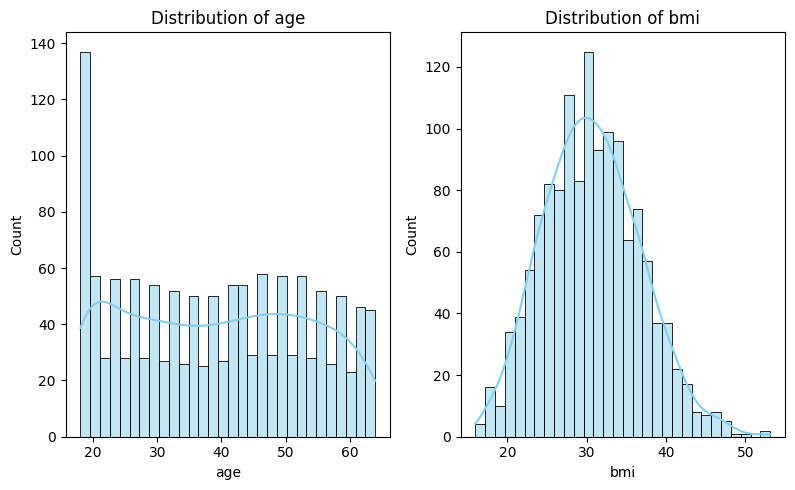

In [32]:
# Distribution of certain explanatory variables of interest

import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical variables
vars_2 = ['age', 'bmi']

# Plot histograms
plt.figure(figsize=(12, 5))
for i, var in enumerate(vars_2):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data_insurance[var], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

Among these 2 variables only the bmi variable seems to follow a relatively normal distribution

In [33]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

data_insurance_copy = data_insurance.copy()
row_index = 0
for i in data_insurance_copy["bmi"]:
    if i < 18.5:
        data_insurance_copy.loc[row_index, "bmi"] = "Underweight"
    elif (i >= 18.5) & (i < 25):
        data_insurance_copy.loc[row_index, "bmi"] = "Normal weight"
    elif (i >= 25) & (i < 30):
        data_insurance_copy.loc[row_index, "bmi"] = "Overweight"
    elif i >= 30 :
        data_insurance_copy.loc[row_index, "bmi"] = "Obesity"

    row_index = row_index + 1

data_insurance_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,Overweight,0,yes,southwest,16884.92400
1,18,male,Obesity,1,no,southeast,1725.55230
2,28,male,Obesity,3,no,southeast,4449.46200
3,33,male,Normal weight,0,no,northwest,21984.47061
4,32,male,Overweight,0,no,northwest,3866.85520


This command allows to create for each range of value of the body mass index, a category with for example the individuals whose body mass index is less than 18.5 then he is underweight if the index is greater than 30 then he is obese.

bmi
Obesity          707
Overweight       386
Normal weight    225
Underweight       20
Name: count, dtype: int64


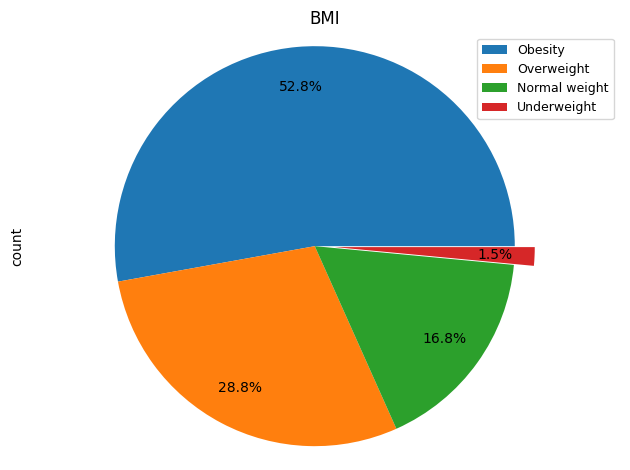

In [34]:
#Graphical representation of the distribution of the body mass index
import matplotlib.pyplot as plt
print(data_insurance_copy["bmi"].value_counts())

data_insurance_copy["bmi"].value_counts().plot(kind="pie",autopct='%1.1f%%',
                             pctdistance=.8,labels=None, explode=[0,0,0,0.1])
plt.title('BMI')
plt.axis('equal')
plt.legend(labels=data_insurance_copy["bmi"].value_counts().index, loc='upper right', fontsize=9)
plt.tight_layout()
plt.show()

More than 80% of individuals are overweight or even at the stage of obesity.


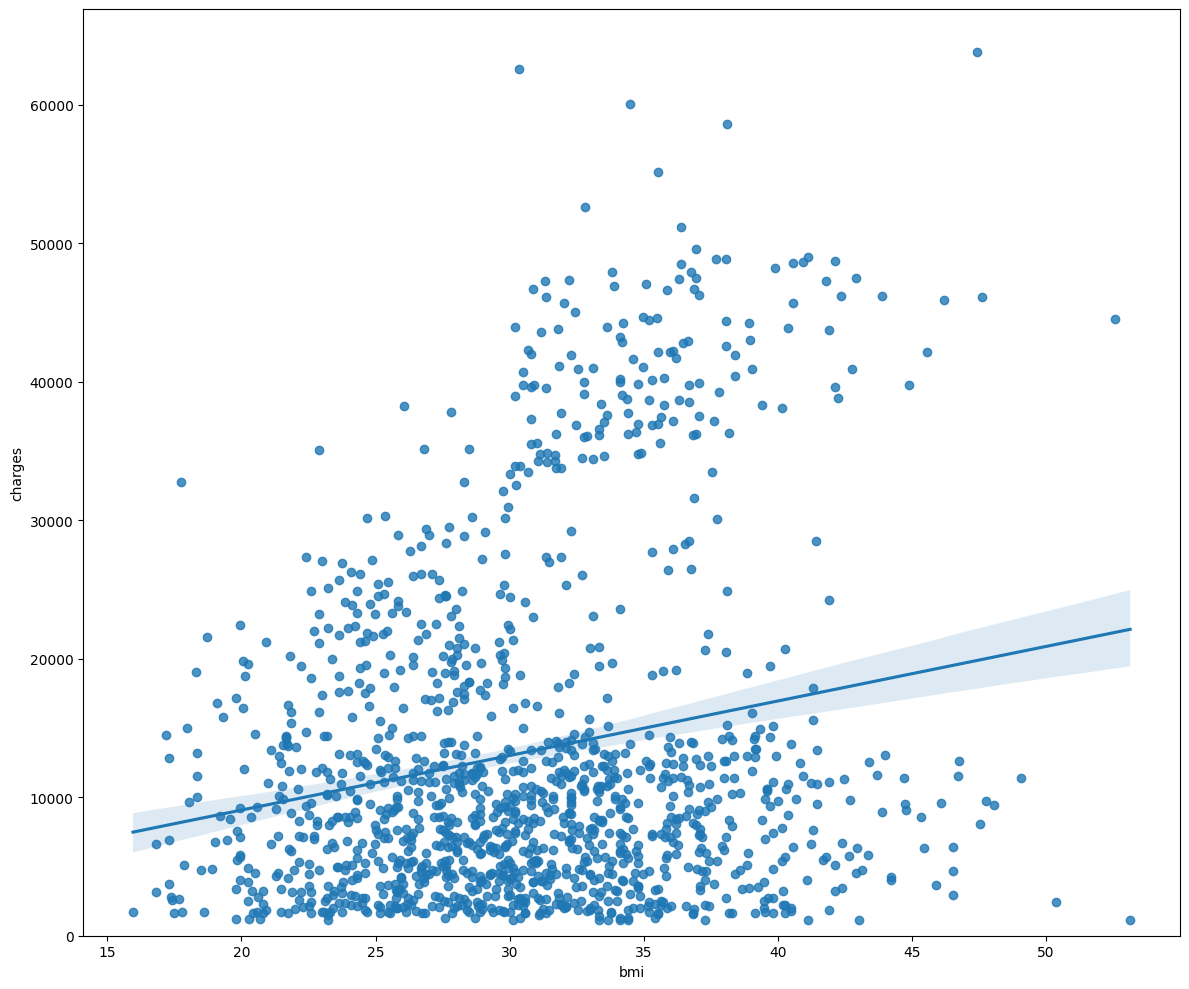

In [35]:
# Graphical representation of charges as a function of body mass index

plt.figure(figsize = (12, 10))
sns.regplot(x = "bmi", y = "charges", data = data_insurance)
plt.ylim(0,)
plt.tight_layout()
plt.show()

Through this graph, we can observe an increasing relationship of charges as a function of bmi, the more the body mass index increases and the more the amount of the medical charge also increases.

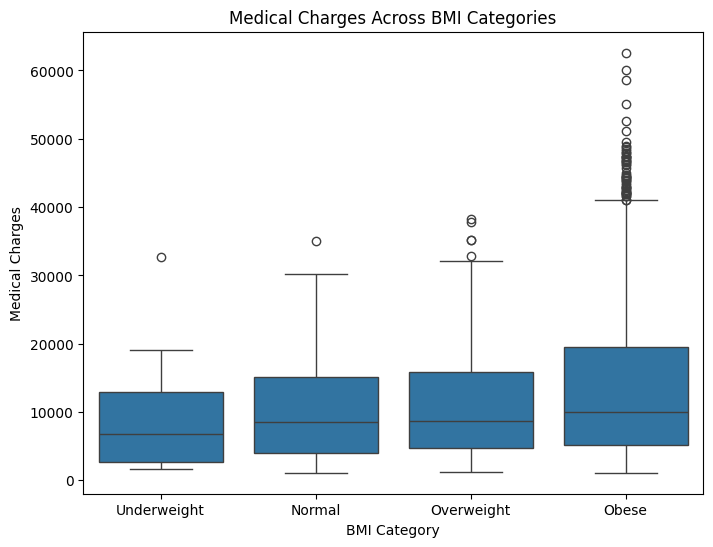

In [36]:
# Categorize BMI into bins (e.g., underweight, normal weight, overweight, obese)
bins = [0, 18.5, 24.9, 29.9, 40]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
data_insurance['bmi_category'] = pd.cut(data_insurance['bmi'], bins=bins, labels=labels, right=False)

# Boxplot for BMI categories vs Charges
plt.figure(figsize=(8, 6))
sns.boxplot(x='bmi_category', y='charges', data=data_insurance)
plt.title('Medical Charges Across BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Medical Charges')
plt.show()

In [37]:
# Calculation of average expenses by BMI category
Mean_charges = data_insurance.groupby('bmi_category')['charges'].mean().reset_index()

# Mean_charges display
print(Mean_charges)


  bmi_category       charges
0  Underweight   8852.200585
1       Normal  10379.499732
2   Overweight  11030.331700
3        Obese  15268.625753


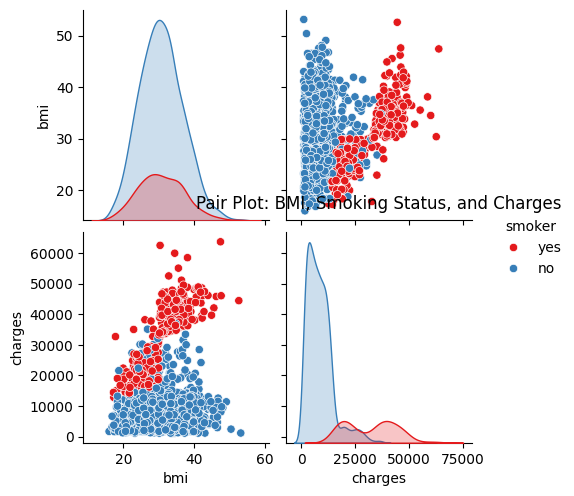

In [38]:
# Pair plot to show interactions between BMI, Smoking, and Charges
sns.pairplot(data_insurance[['bmi', 'smoker', 'charges']], hue='smoker', palette='Set1')
plt.title('Pair Plot: BMI, Smoking Status, and Charges')
plt.show()

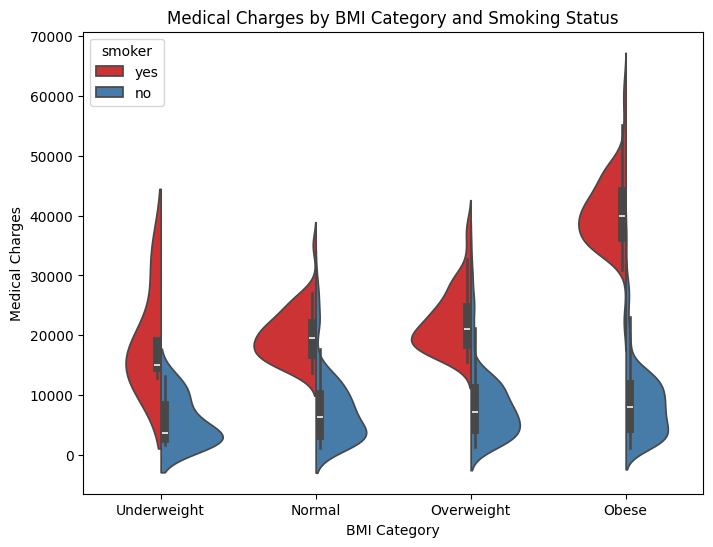

In [39]:
# Interaction between the smoking variable and bmi and charges
# Violin plot for BMI Category vs Charges, colored by Smoking Status
plt.figure(figsize=(8, 6))
sns.violinplot(x='bmi_category', y='charges', hue='smoker', split=True, data=data_insurance, palette='Set1')
plt.title('Medical Charges by BMI Category and Smoking Status')
plt.xlabel('BMI Category')
plt.ylabel('Medical Charges')
plt.show()

On the graph above, we can see the reciprocal influence of the variables smoker and bmi on the amount of the charges.
In the underweight category, we see that smokers and non-smokers mix relatively well. But for the superior categories  we see a clear differentiation between smokers and non-smokers with a higher amount of charges for smokers and a really significant differentiation in the obese category.

We can also see that whatever the body mass category, the amount of charges for non-smokers remains quite similar and low.

In [40]:
bins = [0, 18.5, 24.9, 29.9, 40]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
data_insurance['bmi_category'] = pd.cut(data_insurance['bmi'], bins=bins, labels=labels, right=False)

# Filter for smokers and non-smokers who are overweight or obese
smokers = data_insurance[data_insurance['smoker'] == 'yes']
non_smokers = data_insurance[data_insurance['smoker'] == 'no']

# Calculate the percentage of smokers who are overweight or obese
smokers_overweight_obese = smokers[smokers['bmi_category'].isin(['Overweight', 'Obese'])]
smokers_percentage = (len(smokers_overweight_obese) / len(smokers)) * 100

# Calculate the percentage of non-smokers who are overweight or obese
non_smokers_overweight_obese = non_smokers[non_smokers['bmi_category'].isin(['Overweight', 'Obese'])]
non_smokers_percentage = (len(non_smokers_overweight_obese) / len(non_smokers)) * 100

# Results display
print(f"Percentage of smokers who are overweight or obese : {smokers_percentage:.2f}%")
print(f"Percentage of non-smokers who are overweight or obese : {non_smokers_percentage:.2f}%")

Percentage of smokers who are overweight or obese : 72.26%
Percentage of non-smokers who are overweight or obese : 75.85%


In [41]:
# Group by 'smoker' and 'bmi_category' to count occurrences

bmi_smoker_distribution = data_insurance.groupby(['smoker', 'bmi_category']).size().unstack()

# Result display
print(bmi_smoker_distribution)

bmi_category  Underweight  Normal  Overweight  Obese
smoker                                              
no                     15     172         305    502
yes                     5      50          72    126


In [42]:
from scipy.stats import stats
# Filter the data for a specific example, for example for bmi category= "obese"
df_obese = data_insurance[data_insurance['bmi_category'] == 'Obese']

# Separate groups: obese smokers and obese non-smokers
smoker_obese = df_obese[df_obese['smoker'] == 'yes']['charges']
no_smoker_obese = df_obese[df_obese['smoker'] == 'no']['charges']

t_stat, p_val_ttest = stats.ttest_ind(smoker_obese, no_smoker_obese, equal_var=False)
print(f"T-test : Statistic = {t_stat}, p-value = {p_val_ttest}")

if p_val_ttest < 0.05:
    print("There is a significant difference between the two categories of smoker on charges.")
else:
    print("There isn't a significant difference between the two categories of smoker on charges.")

T-test : Statistic = 51.91458484799893, p-value = 1.5349810939013025e-115
There is a significant difference between the two categories of smoker on charges.


<ipython-input-42-59e5275e839b>:9: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat, p_val_ttest = stats.ttest_ind(smoker_obese, no_smoker_obese, equal_var=False)


The student test (t-test) which allows to evaluate the significance between two groups of smokers and non-smokers for the same category of body mass on the amount of charges and to see if there is a difference between the 2 categories of smokers. With a p-value significantly lower than 0.05, we conclude that for the same category of body mass, namely obese people, smoking has a greater influence on the increase in charges than not smoking.

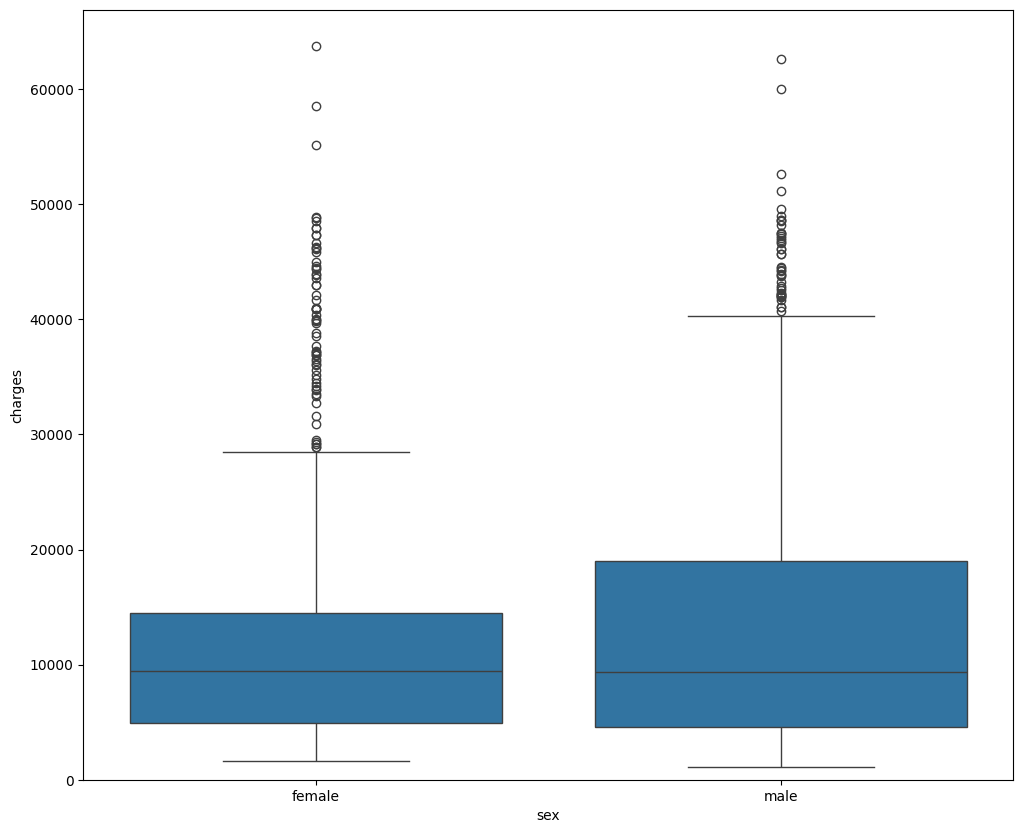

In [43]:
# Influence of the sex variable on charges

plt.figure(figsize = (12, 10))
sns.boxplot(x = "sex", y = "charges", data = data_insurance)
plt.ylim(0,)
plt.show()

We can observe a slight difference depending on whether you are a man or a woman in the amount of charges with a higher amount for men. But this difference is not very significant visually. It can also be noted that the distribution of charges is more disparate among men than among women.

In [44]:

# significance test of male and female categories on charges

female_charges = data_insurance[data_insurance['sex'] == 'female']['charges']
male_charges = data_insurance[data_insurance['sex'] == 'male']['charges']

t_stat, p_val_ttest = stats.ttest_ind(female_charges, male_charges, equal_var=False)
print(f"T-test : Statistic = {t_stat}, p-value = {p_val_ttest}")

if p_val_ttest < 0.05:
    print("There is a significant difference between the two categories male and female.")
else:
    print("There isn't a significant difference between the two categories male and female.")

T-test : Statistic = -2.1008878232359565, p-value = 0.03584101495601664
There is a significant difference between the two categories male and female.


<ipython-input-44-2cd0d0638cc4>:6: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat, p_val_ttest = stats.ttest_ind(female_charges, male_charges, equal_var=False)


According to the test above, the fact that one is a man or a woman has an influence on the amount of charges. But this is to be qualified by the fact that the p-value is close to 0.05, so we have a significance but not very high, so the influence of the 'sex' variable is not very significant.

In [ ]:
# Check for missing values
print(data_insurance.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


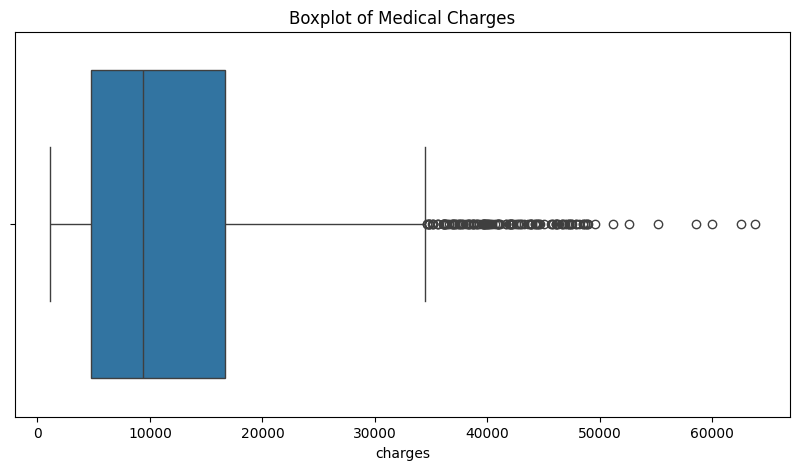

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Detect outliers using boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_insurance['charges'])
plt.title("Boxplot of Medical Charges")
plt.show()

In [45]:
# Outlier detection
Q1 = data_insurance['charges'].quantile(0.25)
Q3 = data_insurance['charges'].quantile(0.75)
IQR = Q3 - Q1

outliers = data_insurance[(data_insurance['charges'] < (Q1 - 1.5 * IQR)) |
                          (data_insurance['charges'] > (Q3 + 1.5 * IQR))]

print(f"Number of outliers detected : {len(outliers)}")

Number of outliers detected : 139


In [46]:
# Create an "Outlier" column (1 = outlier, 0 = non-outlier)
data_insurance['outlier'] = (data_insurance['charges'] > Q3 + 1.5 * IQR).astype(int)
data_insurance[['sex', 'smoker']] = data_insurance[['sex', 'smoker']].replace({'female': 0, 'male': 1, 'no': 0, 'yes': 1})


print(data_insurance.head())

# Compare statistics
print(data_insurance.groupby('outlier')[['age', 'bmi', 'smoker', 'charges']].mean())

   age  sex     bmi  children  smoker     region      charges bmi_category  \
0   19    0  27.900         0       1  southwest  16884.92400   Overweight   
1   18    1  33.770         1       0  southeast   1725.55230        Obese   
2   28    1  33.000         3       0  southeast   4449.46200        Obese   
3   33    1  22.705         0       0  northwest  21984.47061       Normal   
4   32    1  28.880         0       0  northwest   3866.85520   Overweight   

   outlier  
0        0  
1        0  
2        0  
3        0  
4        0  
               age        bmi    smoker       charges
outlier                                              
0        38.989992  30.095200  0.115096   9927.753402
1        41.079137  35.564604  0.978417  42103.947206


We wanted to extract the outliers in the charges variable and see mean values of  its characteristic variables  such bmi, smoker et age and compare them with those of the non-outliers.

From what we can observe, the average age of outliers is a little higher(41.079 vs 38.98 for no outliers), the body mass index is also significantly higher (35.56 vs 30.095 for no outliers), smoker is close to 1 and smoker is close to 0 for no outlier. We can therefore assume that variables such as age, a higher body mass index and smoking contribute to causing more medical expenses.

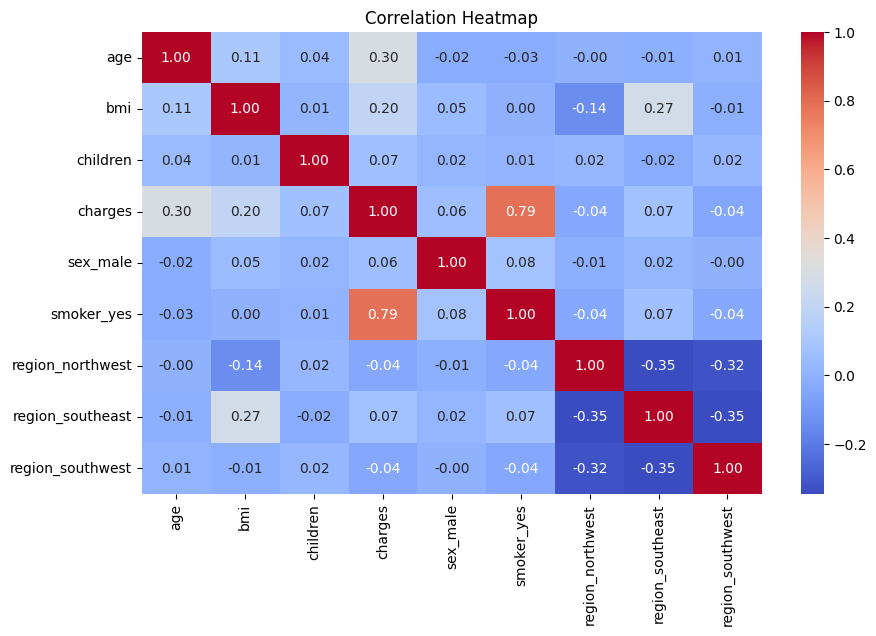

In [ ]:
# Correlation matrix
corr_matrix = data_insurance.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

On this correlation matrix, we can observe that the variable smoker is very correlated with the variable 'charges', so it exerts a very significant influence on the amount of expenses. The other variables exerting a significant influence on charges are 'age' and 'bmi'.

In [57]:
import scipy.stats as stats

# Transform 'sex' and 'smoker' into 0 and 1
data_insurance[['sex', 'smoker']] = data_insurance[['sex', 'smoker']].replace({'female': 0, 'male': 1, 'no': 0, 'yes': 1})
data_insurance = pd.get_dummies(data_insurance, columns=['region'], drop_first=True)
# Create a copy containing the variables needed for the analysis

data_insurance2 = data_insurance[['sex', 'smoker', 'charges']].copy()

# correlation Pearson computation
for col in data_insurance:
    correlation, p_value = stats.pearsonr(data_insurance[col], data_insurance['charges'])
    print(f"{col}: correlation = {correlation:.2f}, p-value = {p_value:.4f}")

age: correlation = 0.30, p-value = 0.0000
sex: correlation = 0.06, p-value = 0.0361
bmi: correlation = 0.20, p-value = 0.0000
children: correlation = 0.07, p-value = 0.0129
smoker: correlation = 0.79, p-value = 0.0000
charges: correlation = 1.00, p-value = 0.0000
region_northwest: correlation = -0.04, p-value = 0.1446
region_southeast: correlation = 0.07, p-value = 0.0068
region_southwest: correlation = -0.04, p-value = 0.1141


The different correlation values ​​show that the variables, age, bmi, sex, children and region_southeast are weakly correlated to the variable charges but their respective p-value is less than 0.05 which indicates that this relationship is statistically significant, but the correlation itself is weak.

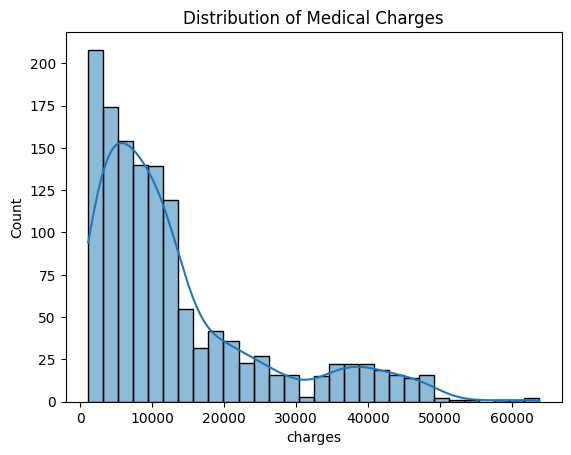

In [ ]:
sns.histplot(data_insurance['charges'], bins=30, kde=True)
plt.title("Distribution of Medical Charges")
plt.show()

In [ ]:
import scipy.stats as stats

skewness = stats.skew(data_insurance['charges'])
kurtosis = stats.kurtosis(data_insurance['charges'])
print(skewness,kurtosis)

1.5141797118745743 1.595821363956751


 Skewness=1.51:
 The distribution is right-skewed (positively skewed). This means that there are more values ​​in the lower part of the distribution, but there is a "tail" on the right (rare high values).

Kurtosis=1.59:
This means that the distribution is less pointy and has lighter tails than normal (flatter). Extreme values ​​(outliers) are therefore less frequent compared to a normal distribution.

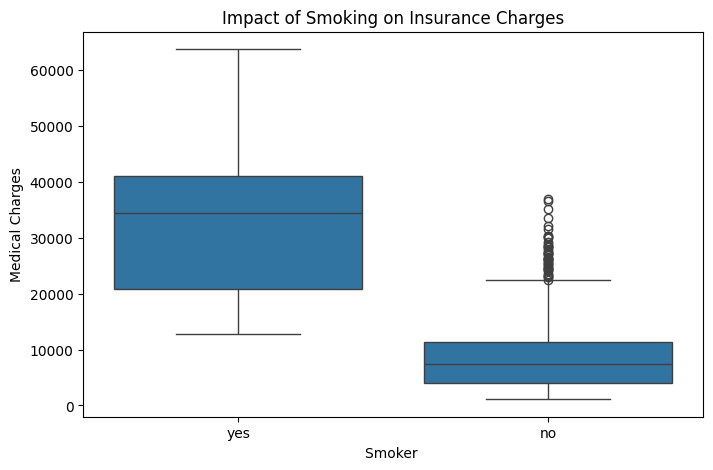

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_insurance['smoker'], y=data_insurance['charges'])
plt.title("Impact of Smoking on Insurance Charges")
plt.xlabel("Smoker ")
plt.ylabel("Medical Charges")
plt.show()

Here we can see a significant difference in the amount of expenses depending on whether you are a smoker or a non-smoker. A smoker will incur more expenses than a non-smoker.

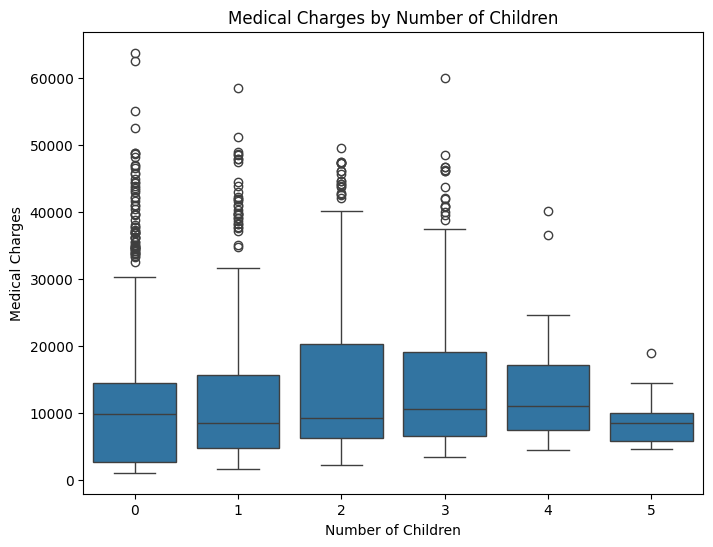

In [5]:
# Boxplot of charges by number of children
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_insurance['children'], y=data_insurance['charges'])
plt.title("Medical Charges by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Medical Charges")
plt.show()

We can see that medical expenses increase in parallel with the increase in the number of children, with maximum expenses around 2 to 3 children and then experience a decrease in expenses.

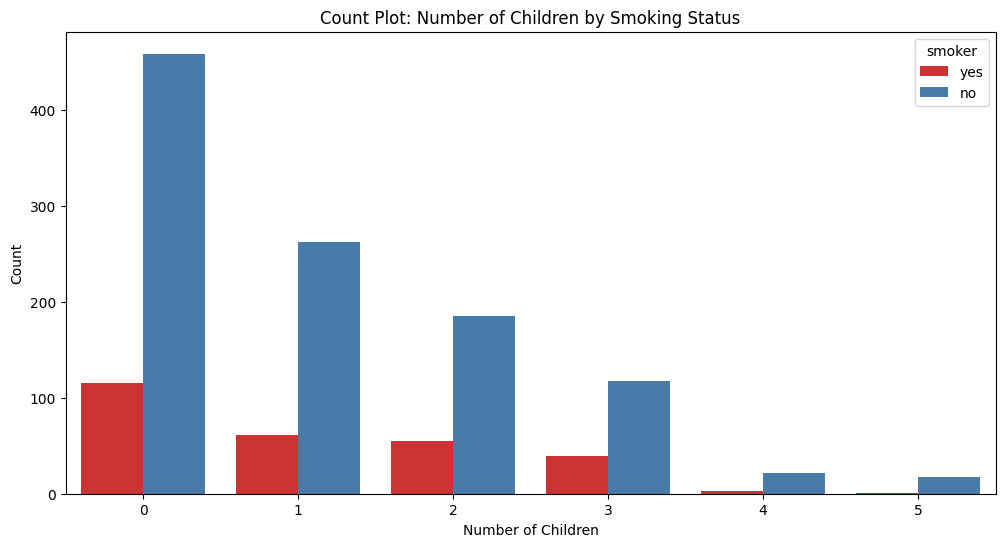

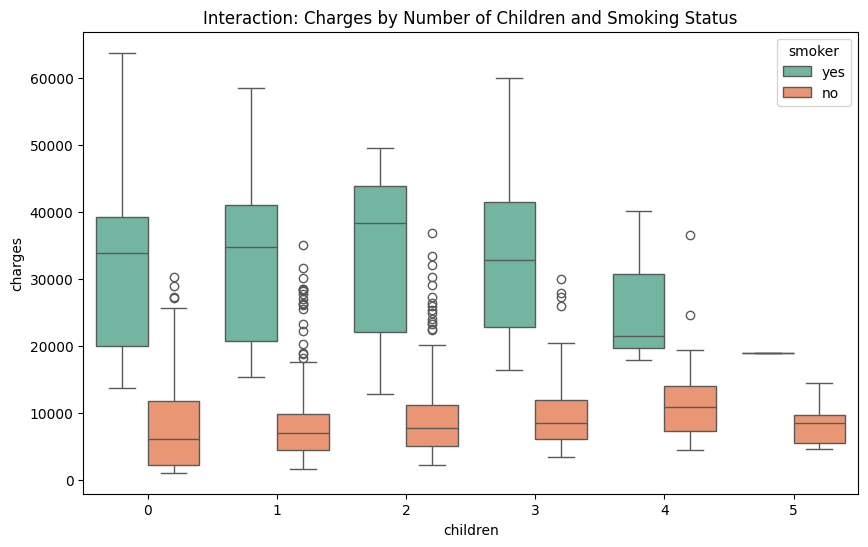

In [76]:
# Create a Count Plot to examine the relationship between 'smoker' and 'children'
plt.figure(figsize=(12, 6))
sns.countplot(data=data_insurance, x='children', hue='smoker', palette='Set1')
plt.title('Count Plot: Number of Children by Smoking Status')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

# Interaction between Number of Children et Smoking Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_insurance, x='children', y='charges', hue='smoker', palette='Set2')
plt.title('Interaction: Charges by Number of Children and Smoking Status')
plt.show()

The 2 graphs above highlight the relationship between the number of children and smoking or not and the interaction of these 2 variables combined on the influence they have on the charges.

It can be observed that in both cases of smoking, the frequency of having 1 or more children decreases. However, large families are more often observed among non-smokers than among smokers.

We also observe a very clear differentiation between smokers and non-smokers regarding the amount of medical expenses, with significantly higher amounts for smokers than for non-smokers. In addition, the distribution of values ​​on the charges are very centered around the median and therefore little disparity among non-smokers, unlike smokers who record a strong disparity in terms of medical expenses.

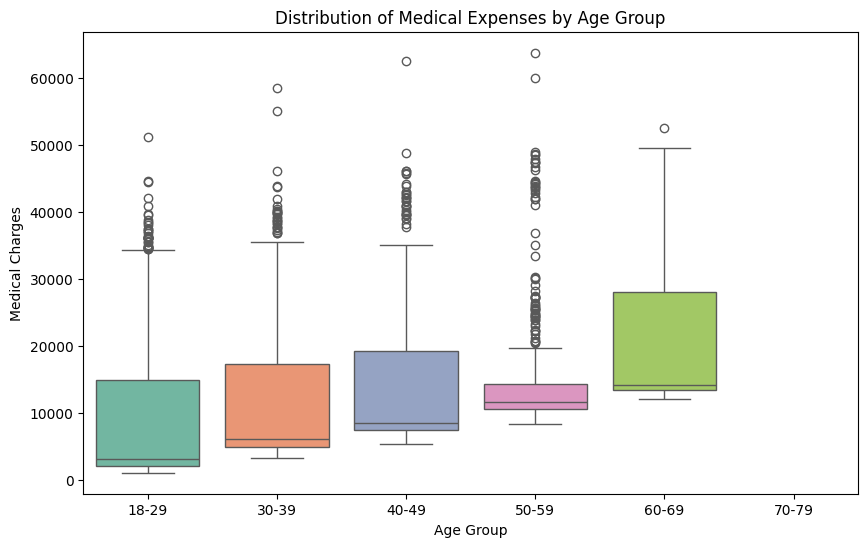

In [32]:
bins = [18, 30, 40, 50, 60, 70, 80]
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70-79"]  # 6 labels

data_insurance["age_group"] = pd.cut(data_insurance["age"], bins=bins, labels=labels, right=False)
data_insurance["age_group"].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
sns.boxplot(x="age_group", y="charges", data=data_insurance, palette="Set2")

plt.xlabel("Age Group")
plt.ylabel("Medical Charges")
plt.title("Distribution of Medical Expenses by Age Group")
plt.show()

We can see a significant increase in medical expenses as age increases. It can also be noted that for each of these age groups, the median expenditure is quite low compared to the general distribution of expenditure. We have a fairly heterogeneous distribution of expenditure for each age group.

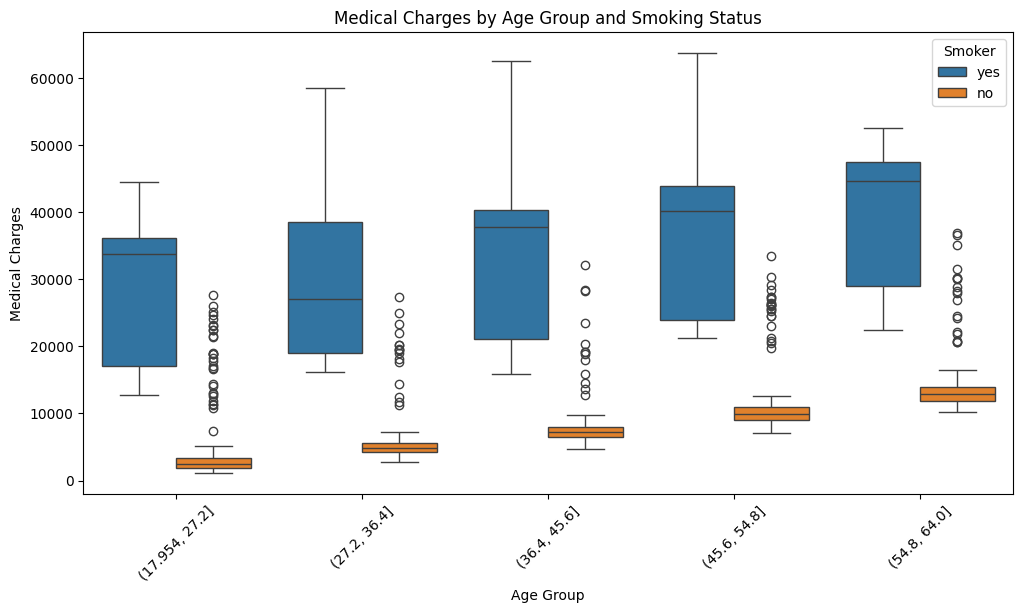

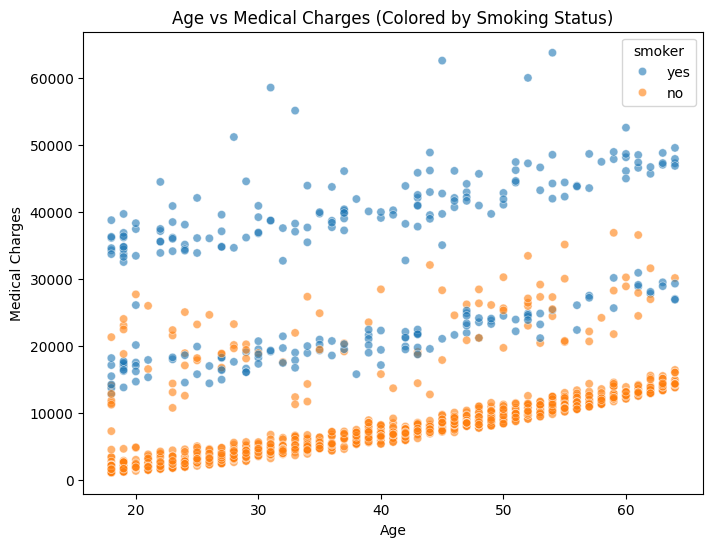

In [6]:
# Interaction between age and smoker variables and charges

# Boxplot of charges according to age, separated by smoking status

plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(data_insurance['age'], bins=5), y=data_insurance['charges'], hue=data_insurance['smoker'])
plt.title("Medical Charges by Age Group and Smoking Status")
plt.xlabel("Age Group")
plt.ylabel("Medical Charges")
plt.xticks(rotation=45)
plt.legend(title="Smoker")
plt.show()


# Scatter plot Age vs Charges, colored by smoking status
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_insurance['age'], y=data_insurance['charges'], hue=data_insurance['smoker'], alpha=0.6)
plt.title("Age vs Medical Charges (Colored by Smoking Status)")
plt.xlabel("Age")
plt.ylabel("Medical Charges")
plt.show()

Through these 2 graphs, we observe that the interaction of the variables smoker and age clearly highlights a clear differentiation in terms of medical expenditure between the group of individuals who smoke and the group who do not smoke and those for all ages. As previously observed, medical expenditure is higher for smokers.

<ipython-input-8-4e840e3f02b0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=data_insurance, palette='Set2')


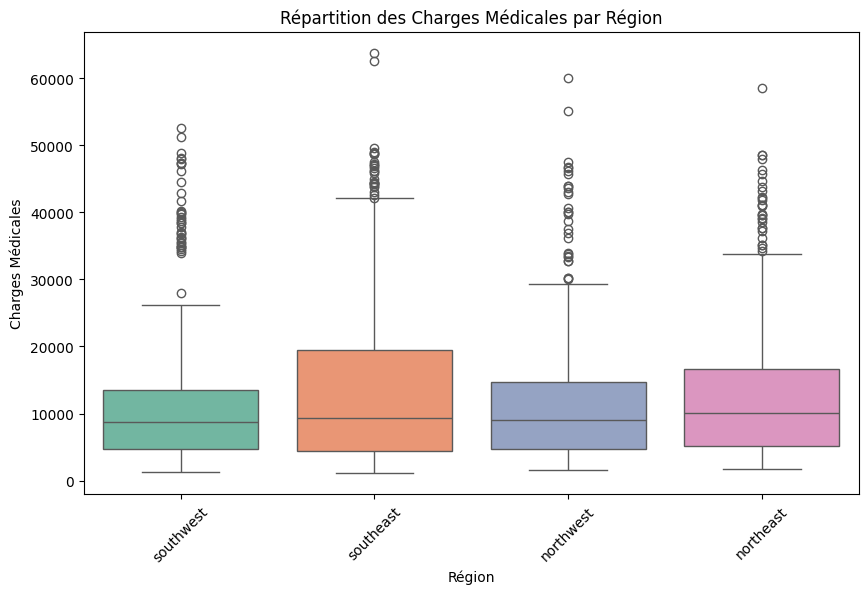

In [8]:
# Medical charges by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=data_insurance, palette='Set2')

plt.xlabel("Région")
plt.ylabel("Charges Médicales")
plt.title("Répartition des Charges Médicales par Région")
plt.xticks(rotation=45)  # Tourne les labels des régions si besoin
plt.show()

There is no significant difference in terms of medical expenditure according to the regions. We can just notice slightly higher expenditure in the southeast and northeast regions.

In [16]:

# Statistical analysis on region
regional_analysis = data_insurance.groupby('region')['charges'].agg(['mean', 'median', 'std', 'count']).reset_index()
print("Detailed Medical Cost Analysis by Region:")
print(regional_analysis)

Detailed Medical Cost Analysis by Region:
      region          mean        median           std  count
0  northeast  13406.384516  10057.652025  11255.803066    324
1  northwest  12417.575374   8965.795750  11072.276928    325
2  southeast  14735.411438   9294.131950  13971.098589    364
3  southwest  12346.937377   8798.593000  11557.179101    325


As we could see before, no significant differences in medical cost between region.

In [77]:
import scipy.stats as stats

 # Perform an analysis of variance (ANOVA) to compare the average charges between regions
regions = [data_insurance[data_insurance['region'] == region]['charges'] for region in data_insurance['region'].unique()]
anova_result = stats.f_oneway(*regions)
print(f'ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')

ANOVA result: F-statistic = 2.96962669358912, p-value = 0.0308933560705201


The p-value is less than 0.05 but it is not very small either, p-value=0.03. This means that there is indeed a difference in terms of average charges between regions but this difference is not very significant.

In [4]:
# Print average charges per region
regional_costs = data_insurance.groupby('region')['charges'].mean()
print("Average Medical Costs by Region:")
print(regional_costs)

Average Medical Costs by Region:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


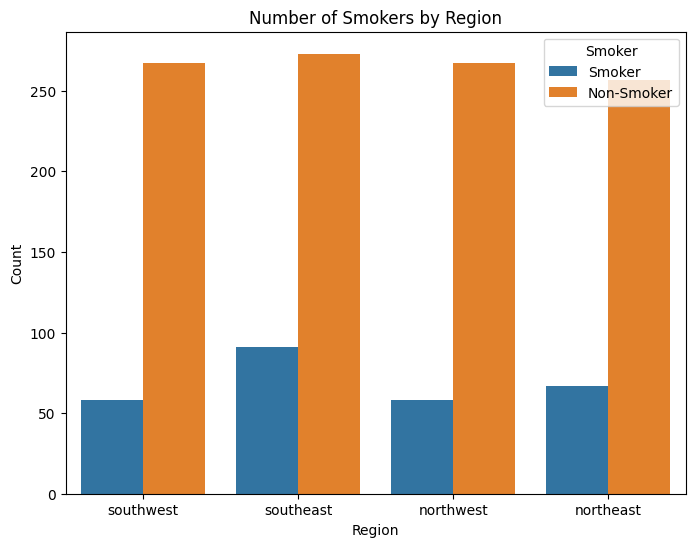

In [15]:
# Interaction between 'smoker' and 'region' variables
# Countplot of smokers by region
plt.figure(figsize=(8, 6))
sns.countplot(x=data_insurance['region'], hue=data_insurance['smoker'])
plt.title("Number of Smokers by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title="Smoker", labels=["Smoker", "Non-Smoker"])
plt.show()

In [14]:
# Count the number of smokers and non-smokers per region
smoker_counts = data_insurance.groupby(['region', 'smoker']).size().unstack()
print("Number of Smokers and Non-Smokers per Region:")
print(smoker_counts)

Number of Smokers and Non-Smokers per Region:
smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


As can be seen in the graph above, smokers are most observed in the southeast and northeast regions. Non-smokers are fairly well distributed between the different regions.

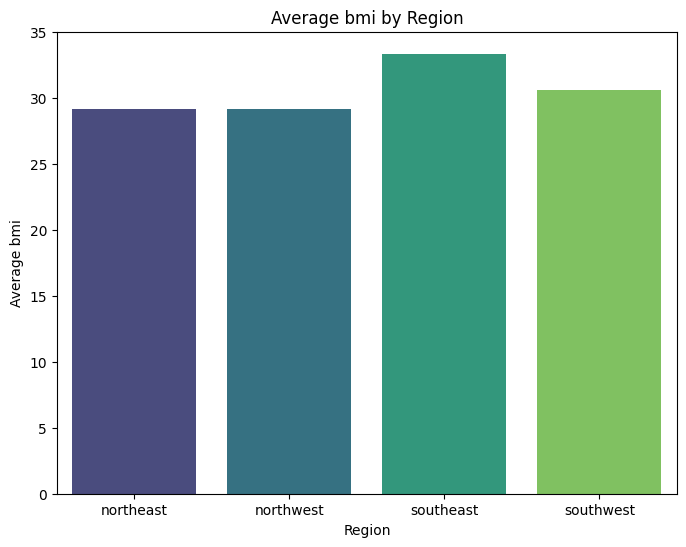

In [78]:
# Barplot of average bmi by region
plt.figure(figsize=(8, 6))
avg_bmi_by_region = data_insurance.groupby('region')['bmi'].mean().reset_index()
sns.barplot(x='region', y='bmi', data=avg_bmi_by_region, palette='viridis')
plt.title("Average bmi by Region")
plt.xlabel("Region")
plt.ylabel("Average bmi")
plt.show()

We can see on this barplot, the region with the highest average body mass index is in the southeast


region
northeast    39.268519
northwest    39.196923
southeast    38.939560
southwest    39.455385
Name: age, dtype: float64


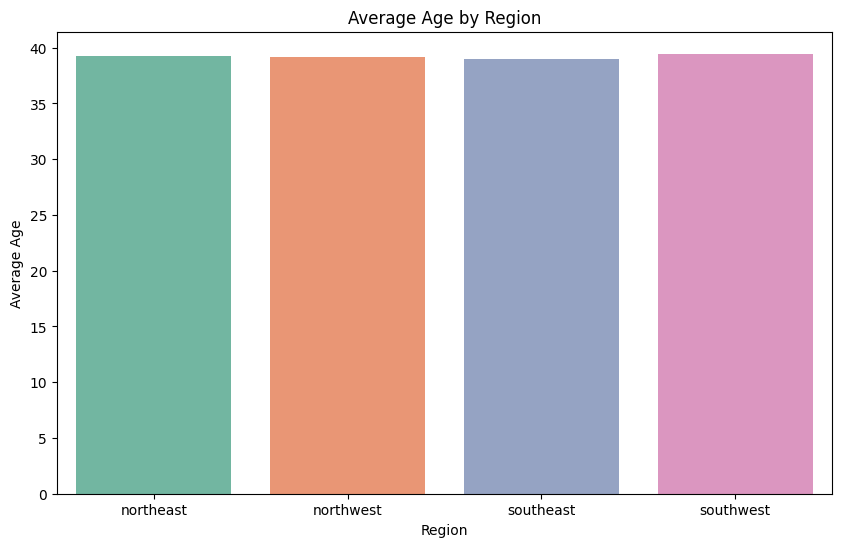

In [80]:
# # Calculate the average age by region
age_by_region = data_insurance.groupby('region')['age'].mean()

# Results display
print(age_by_region)

 # # Plot a bar plot of the average age by region

plt.figure(figsize=(10, 6))
sns.barplot(x=age_by_region.index, y=age_by_region.values, palette='Set2')
plt.title('Average Age by Region')
plt.xlabel('Region')
plt.ylabel('Average Age')
plt.show()

The average age by region is almost similar. So here the age factor has no influence on the different average charges per region.

region
northeast    1.046296
northwest    1.147692
southeast    1.049451
southwest    1.141538
Name: children, dtype: float64


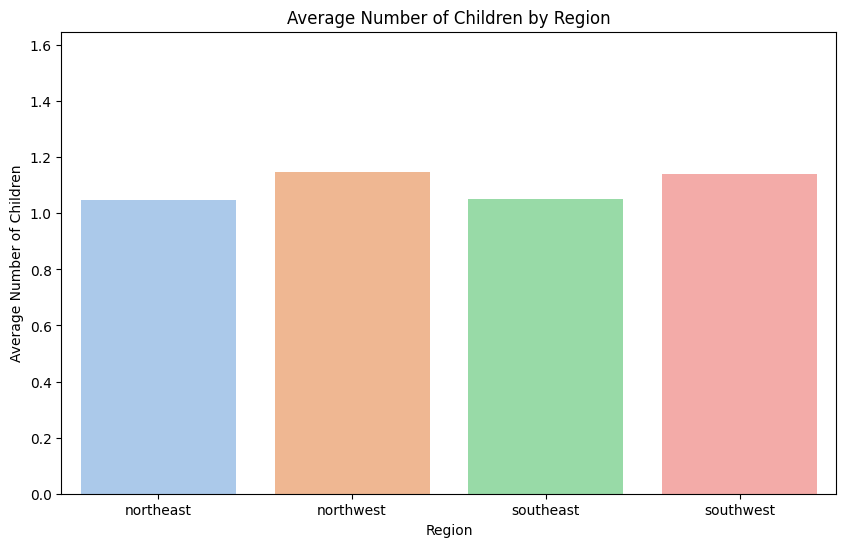

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculation of the average number of children per region

children_by_region = data_insurance.groupby('region')['children'].mean()

# Result display
print(children_by_region)

plt.figure(figsize=(10, 6))
sns.barplot(x=children_by_region.index, y=children_by_region.values, palette='pastel')

# Add titles and label
plt.title('Average Number of Children by Region')
plt.xlabel('Region')
plt.ylabel('Average Number of Children')
plt.ylim(0, max(children_by_region.values) + 0.5)  # Adjustment of Y scale
plt.show()

No significant difference in the average number of children per region. The children factor does not influence the average charges per region.

The main objective of this data analysis was to extract important information on our variable of interest that represents the charges, the target variable that is of capital interest for different organizations such as insurance companies. Also these companies are interested in knowing which elements, which factors must be taken into account as an explanatory element in the constitution of medical expenses. To know this several procedures were put in place in order to observe which variables exerted an influence on medical expenses. The variables studied during the analysis were the age of the individuals, the number of children ('children'), smokers and non-smokers ('smoker'), the region and the body mass index ('bmi').

For the purpose of exhaustiveness, we analyzed a data set composed of 1338 individuals. To carry out this project, several steps were carried out:

1) Data Preprocessing:

Check duplicate lines, missing values, etc...

2) Exploratory Data Analysis

Perform a comprehensive analysis of the dataset to understand the distribution of variables and identify any correlations between features such as age, BMI, smoking status, and medical costs (charges).
Use descriptive statistics and visualizations to summarize the data and highlight any interesting trends or outliers.

3)Feature Exploration:

Explore the impact of different features on medical costs, focusing on key variables like BMI, smoking status, and the number of dependents.
Investigate potential interactions between variables and how they influence insurance charges using correlation matrix and graphs.

4) Visualization:

Use Matplotlib and Seaborn to create visualizations that effectively communicate  findings. Examples might include scatter plots, box plots, heatmaps, and bar charts.


Here are the main key elements of our results:

Some key figures on the characteristics that make up the different explanatory variables of medical expenditure:

Here are the main key elements of our results:

Some key figures on the characteristics that make up the different explanatory variables of medical expenses:

-On average, individuals are rather young people with an average age of around 39 years.

- More than 80% of individuals are overweight or in the obese stage
- Around 80% of individuals are non-smokers
-There are almost as many men as women
-On average, there is a little more than one child


By comparing outliers and non-outliers in the 'charges' variable, we were able to see that there were some differences between certain variables such as 'smoker', 'age', 'bmi'.


On the 'bmi' variable, the following observations were made:
- On average, overweight and obese people incur more expenses compared to less corpulent categories

- The interaction of the bmi variable with 'smoker' made it possible to observe a clear differentiation in terms of medical expenses

- No difference in terms of proportion for the 4 bmi categories depending on whether you are a smoker or not

On the 'smoker' variable:
- A very clear difference in terms of expenditure between non-smokers and smokers with higher average expenditure for smokers, as confirmed by the T-test regarding the significance of the differences in terms of expenditure.

On the variable 'sex':

No significant difference in the amount of expenditure depending on whether one is a man or a woman

On the variable 'children':
We observe that expenditure increases with the number of children.

- The implementation of a correlation table made it possible to show that the variables most correlated with the variable 'charges' are 'smoker', 'age' and 'bmi' with a p-value test displaying a very small value, which clearly shows that the correlations of these variables with our target variable are significant. For the other variables, the correlations are weaker although some also display a very low p-value.

-On the variable 'region':
-On average, the southeast and northeast regions record higher expenses. These regions record higher expenses because there are a higher number of smokers in these regions than elsewhere.

Several interactions were applied between the region variable with age and body mass index, we saw that age had no influence on the region variable but that the southeast region had an average body mass index greater than 30 and therefore a higher bmi compared to the other regions, this which could also explain higher expenses.

To summary:

Number of children (children):

The impact of the number of children on medical costs is weaker compared to other variables.
Region:

The influence of the region is less marked, but some regions (eg: southeast) seem to have higher costs.

Correlations:

Smoker and expenses have the strongest correlation.
Age and expenses also show a positive correlation.
BMI and expenses have a weaker relationship, but become significant in smokers.

Detection of extreme values ​​(Outliers)
There are several extreme values ​​in charges, mainly among smokers and elderly people with a high BMI.

Recommendation: A more in-depth study on medical history and the type of care received could refine the analysis and therefore add other variables to try to better explain medical expenses


